In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [40]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
X_train = X_train/255
X_test = X_test/255

In [42]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [45]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4706 - accuracy: 0.8777: 0s - los
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9252


In [46]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9261


[0.26720163226127625, 0.9261000156402588]

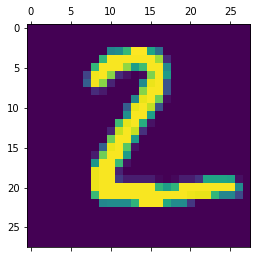

In [50]:
plt.matshow(X_test[1])

In [65]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([3.7462723e-01, 7.3415637e-03, 9.9961889e-01, 3.5135314e-01,
       6.0149802e-10, 8.3097899e-01, 8.0802673e-01, 7.6937052e-13,
       1.3181767e-01, 3.3891279e-09], dtype=float32)

In [66]:
np.argmax(y_predicted[1])

2

In [67]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [68]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [71]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    2,    2,    0,    4,    3,    3,    1,    0],
       [   0, 1115,    4,    2,    0,    1,    3,    2,    8,    0],
       [   7,    9,  927,   17,    9,    3,   10,   11,   37,    2],
       [   2,    0,   17,  928,    0,   22,    2,   12,   19,    8],
       [   2,    1,    5,    1,  927,    0,    7,    5,   10,   24],
       [  11,    3,    6,   39,   11,  768,   10,    9,   29,    6],
       [  13,    3,   12,    1,    8,   14,  903,    2,    2,    0],
       [   1,    5,   23,    7,    5,    0,    0,  958,    2,   27],
       [   8,   10,    6,   27,    9,   23,    8,   11,  862,   10],
       [  11,    7,    1,   12,   34,    5,    0,   27,    4,  908]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

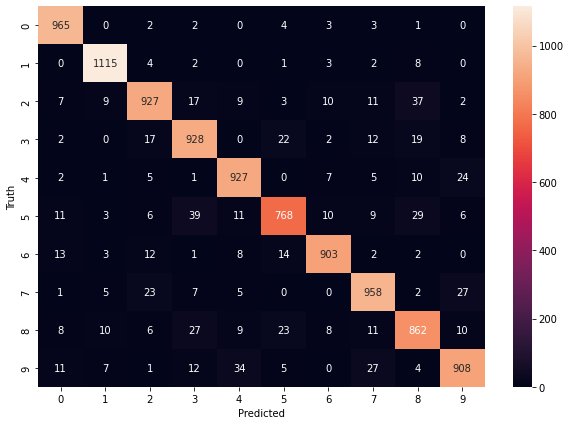

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2781 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1257 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0880 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0671 - accuracy: 0.9798: 
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9840


Text(69.0, 0.5, 'Truth')

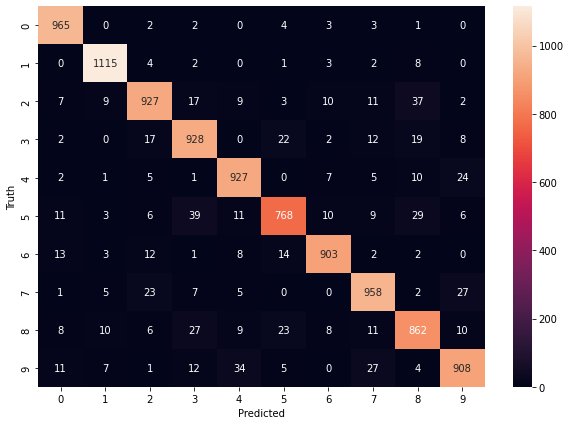

In [74]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')